<h1 style="color:blue;">Scenario 6 notebook   </h1>     

- C1S6.Py01	Regression for interest rate on income and amount funded
- C1S6.Py02	Visualizing residuals for multiple regressions


In [108]:
#Code Block 1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



#style options 

%matplotlib inline  
#if you want graphs to automatically without plt.show

pd.set_option('display.max_columns',500) #allows for up to 500 columns to be displayed when viewing a dataframe

plt.style.use('seaborn-v0_8') #a style that can be used for plots - see style reference above



In [110]:
#Code Block 2
df = pd.read_csv('data/Scenario6.csv', index_col = 0, header=0) 
    #DOES set the first column to the index
    # and the top row as the headers

In [112]:
#Code Block 3
df.head(3)

,Member ID,Loan ID,Origination Date,Interest Rate,Amount Funded,Total Debt,Annual Income,Revolving Accounts,Total Revolving Credit Line,Term,Grade,Employee Title,Length of Employment,Home Ownership,Income Verification,Loan Purpose,Zip Code of Residence,State of Residence,Delinquencies Past 24 Months,Credit Inquires Last 6 Months,Open Accounts,TermNum,TermString,Day,Month,Year
6,735990,789789,2/17/19,7.62,7500,265809.0,92000,6419.0,43000.0,36,A,TD Bank,4.0,MORTGAGE,NaN,credit_card,030xx,NH,NaN,2,5,37,36 months,6,2,2019
8,778284,746115,12/13/18,6.03,10000,152402.0,108000,4653.0,46100.0,36,A,"FlightStats, Inc.",1.0,MORTGAGE,NaN,home_improvement,750xx,TX,NaN,0,10,37,36 months,3,12,2018
4,603349,885844,11/17/19,16.29,15000,227890.0,72000,11702.0,26300.0,36,C,NaN,NaN,MORTGAGE,Verified,house,341xx,FL,NaN,1,18,37,36 months,6,11,2019


<h2 style="color:blue;">C1.S6.Py01 - Regression for interest rate on income and amount funded   </h2>   




<h3 style="color:green;">Import and use statsmodels</h3> 
https://anaconda.org/anaconda/statsmodels

In [116]:
#Code Block 4
import statsmodels
import statsmodels.api as sm

In [118]:
#Code Block 5
X = df['Annual Income']
y = df['Interest Rate']
X = sm.add_constant(X) # adding a constant

reg1 = sm.OLS(y, X).fit()

predictions1 = reg1.predict(X) 
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Interest Rate   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     18.15
Date:                Sun, 15 Sep 2024   Prob (F-statistic):           2.05e-05
Time:                        11:33:54   Log-Likelihood:                -85667.
No. Observations:               30071   AIC:                         1.713e+05
Df Residuals:                   30069   BIC:                         1.714e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            13.8556      0.033    423.004      0.000      13.791      13.920
Annual Income -1.281e-06   3.01e-07     -4.260      0.000   -1.87e-06   -6.92e-07
==============================================================================
Omnibus:                      683.134   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              481.784
Skew:                           0.204   Prob(JB):                    2.41e-105
Kurtosis:                       2.533   Cond. No.                     1.48e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [120]:
#Code Block 6
df_predictions1 = pd.DataFrame(predictions1)
df_predictions1=df_predictions1.rename(columns = {0:'Int_Pred1'})
df_predictions1.head()

,Int_Pred1
6,13.737702
8,13.717204
4,13.763325
7,13.709518
9,13.772292


In [122]:
#Code Block 7
X = df[['Amount Funded', 'Annual Income']]
y = df['Interest Rate']
X = sm.add_constant(X) # adding a constant

reg2 = sm.OLS(y, X).fit()

predictions2 = reg2.predict(X) 
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Interest Rate   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     1077.
Date:                Sun, 15 Sep 2024   Prob (F-statistic):               0.00
Time:                        11:33:55   Log-Likelihood:                -84636.
No. Observations:               30071   AIC:                         1.693e+05
Df Residuals:                   30068   BIC:                         1.693e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.1693      0.048    251.899      0.000      12.075      12.264
Amount Funded     0.0001   2.99e-06     46.203      0.000       0.000       0.000
Annual Income -4.846e-06   3.01e-07    -16.119      0.000   -5.44e-06   -4.26e-06
==============================================================================
Omnibus:                      250.415   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.647
Skew:                           0.087   Prob(JB):                     2.18e-40
Kurtosis:                       2.660   Cond. No.                     2.27e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.27e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [124]:
#Code Block 8
df_predictions2 = pd.DataFrame(predictions2)
df_predictions2=df_predictions2.rename(columns = {0:'Int_Pred2'})
df_predictions2.head()

,Int_Pred2
6,12.761080
8,13.029421
4,13.895648
7,16.459153
9,12.352354


 <h3 style="color:blue;">Create DataFrame for Actual and its Predictions</h3>

In [127]:
#Code Block 9
df_simplereg = df[['Amount Funded', 'Annual Income', 'Interest Rate']]
df_simplereg.head()

,Amount Funded,Annual Income,Interest Rate
6,7500,92000,7.62
8,10000,108000,6.03
4,15000,72000,16.29
7,35000,114000,21.49
9,3600,65000,11.14


In [129]:
#Code Block 10
df_simplereg_results = pd.concat([df_simplereg, df_predictions1, df_predictions2], axis=1)
df_simplereg_results.head()

,Amount Funded,Annual Income,Interest Rate,Int_Pred1,Int_Pred2
6,7500,92000,7.62,13.737702,12.761080
8,10000,108000,6.03,13.717204,13.029421
4,15000,72000,16.29,13.763325,13.895648
7,35000,114000,21.49,13.709518,16.459153
9,3600,65000,11.14,13.772292,12.352354


<Axes: xlabel='Annual Income', ylabel='Interest Rate'>

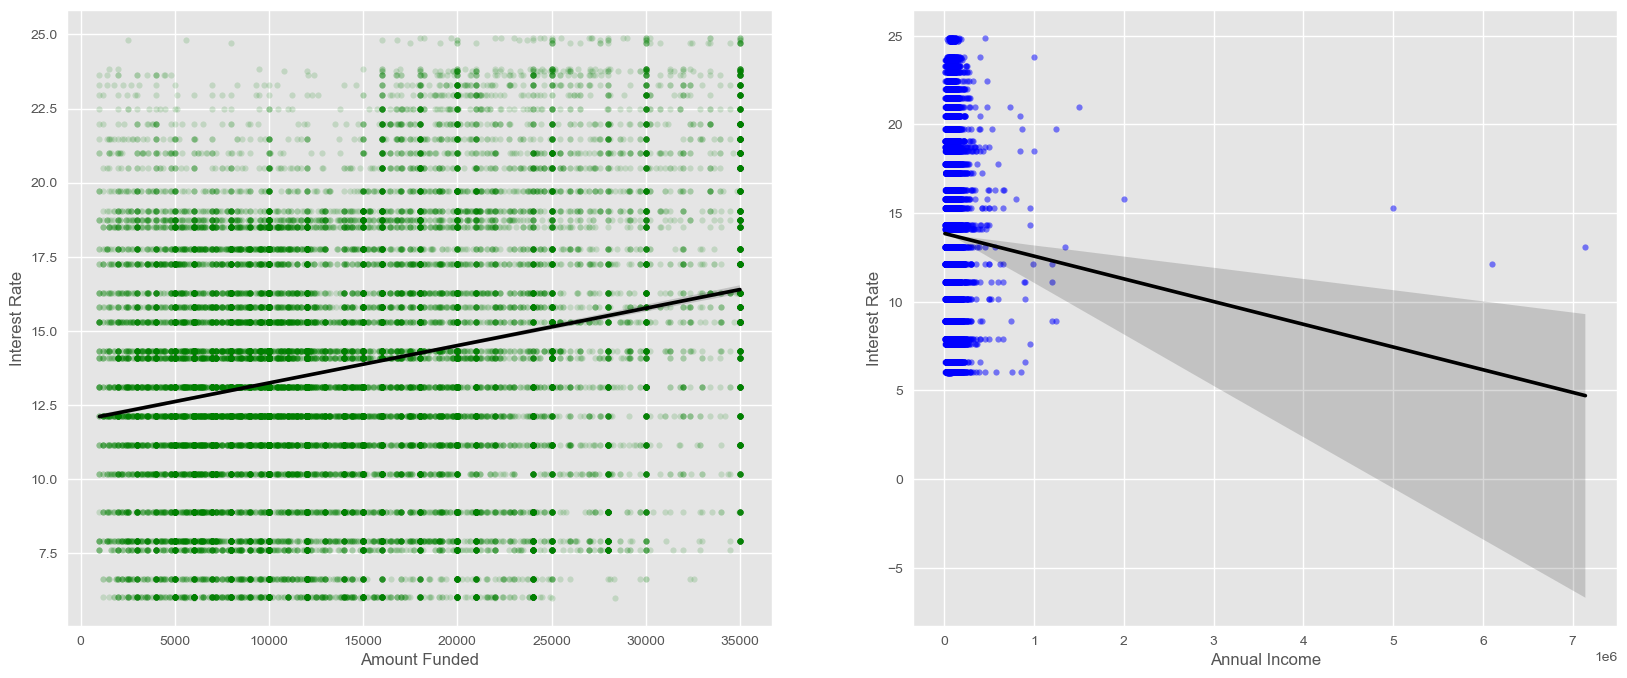

In [131]:
#Code Block 11
plt.style.use('ggplot')
plt.figure(figsize=(20,8))
plt.subplot(121)
sns.regplot(x='Amount Funded', y='Interest Rate', data = df_simplereg, scatter_kws={"color":"green","alpha":0.15,"s":20},
           line_kws={'color': 'black'})
plt.subplot(122)
sns.regplot(x='Annual Income', y='Interest Rate', data = df_simplereg, scatter_kws={"color":"blue","alpha":0.5,"s":20},
           line_kws={'color': 'black'})

<Figure size 2000x800 with 0 Axes>

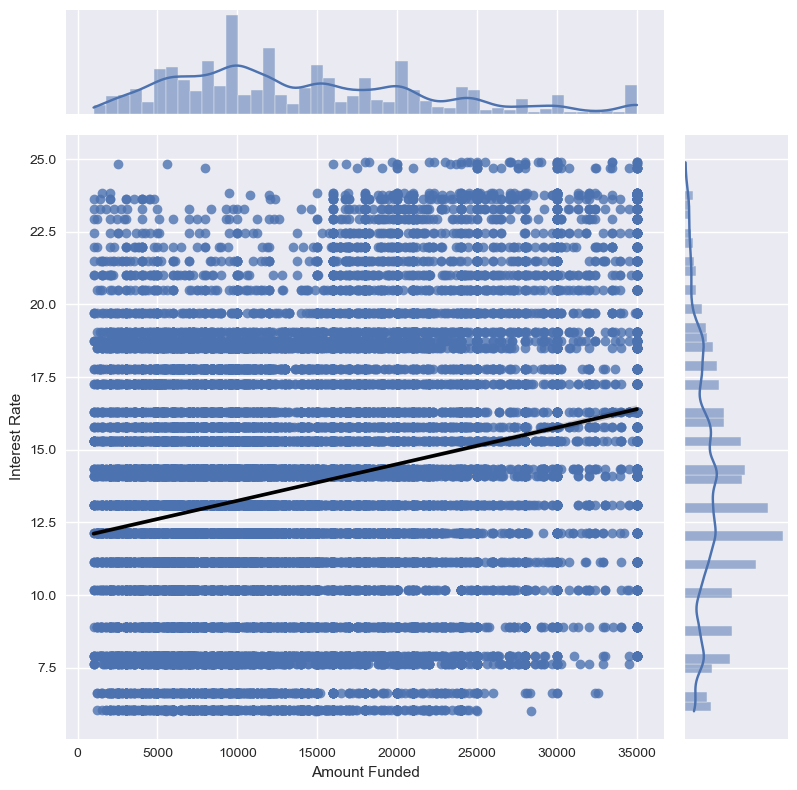

In [146]:
#Code Block 12
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(20,8))
sns.jointplot(x='Amount Funded', y='Interest Rate', kind = "reg", data = df_simplereg, ratio=5, height = 8, 
              line_kws={'color': 'black'})
#plt.subplot(122)
#sns.jointplot(x='Annual Income', y='Interest Rate', data = df_simplereg)

/opt/anaconda3/lib/python3.12/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'line_kws'
  cset = contour_func(


<Figure size 2000x800 with 0 Axes>

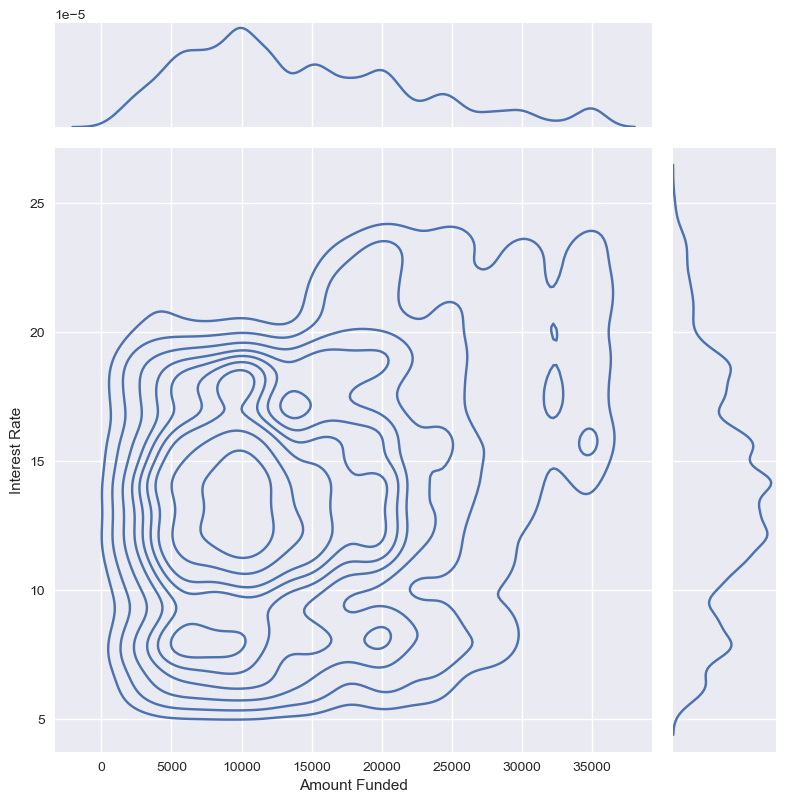

In [192]:
#Code Block 13
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(20,8))
sns.jointplot(x='Amount Funded', y='Interest Rate', kind = "kde", data = df_simplereg, ratio=5, height = 8, 
              line_kws={'color': 'black'})
#plt.subplot(122)
#sns.jointplot(x='Annual Income', y='Interest Rate', data = df_simplereg)

<h2 style="color:blue;">C1.S6.Py02 - Visualizing residuals for multiple regressions</h2>

 <h3 style="color:green;">Calculating residuals</h3>

In [195]:
#Code Block 14
resid1 = reg1.resid
resid2 = reg2.resid
display(resid1.head())
resid2.head()

6   -6.117702
8   -7.687204
4    2.526675
7    7.780482
9   -2.632292
dtype: float64

6   -5.141080
8   -6.999421
4    2.394352
7    5.030847
9   -1.212354
dtype: float64

In [197]:
#Code Block 15
df_resid1 = pd.DataFrame(resid1)
df_resid1=df_resid1.rename(columns = {0:'Resid1'})
display(df_resid1.head())
df_resid2 = pd.DataFrame(resid2)
df_resid2=df_resid2.rename(columns = {0:'Resid2'})
display(df_resid2.head())

,Resid1
6,-6.117702
8,-7.687204
4,2.526675
7,7.780482
9,-2.632292


,Resid2
6,-5.141080
8,-6.999421
4,2.394352
7,5.030847
9,-1.212354


In [199]:
#Code Block 16
df_simplereg_results = pd.concat([df_simplereg_results, df_resid1, df_resid2], axis=1)
df_simplereg_results.head(10)

,Amount Funded,Annual Income,Interest Rate,Int_Pred1,Int_Pred2,Home Ownership,Resid1,Resid2,Home Ownership,Resid1,Resid2,Resid1,Resid2,Resid1,Resid2
6,7500,92000,7.62,13.737702,12.761080,MORTGAGE,-6.117702,-5.141080,MORTGAGE,-6.117702,-5.141080,-6.117702,-5.141080,-6.117702,-5.141080
8,10000,108000,6.03,13.717204,13.029421,MORTGAGE,-7.687204,-6.999421,MORTGAGE,-7.687204,-6.999421,-7.687204,-6.999421,-7.687204,-6.999421
4,15000,72000,16.29,13.763325,13.895648,MORTGAGE,2.526675,2.394352,MORTGAGE,2.526675,2.394352,2.526675,2.394352,2.526675,2.394352
7,35000,114000,21.49,13.709518,16.459153,MORTGAGE,7.780482,5.030847,MORTGAGE,7.780482,5.030847,7.780482,5.030847,7.780482,5.030847
9,3600,65000,11.14,13.772292,12.352354,MORTGAGE,-2.632292,-1.212354,MORTGAGE,-2.632292,-1.212354,-2.632292,-1.212354,-2.632292,-1.212354
10,24000,92000,16.29,13.737702,15.043894,MORTGAGE,2.552298,1.246106,MORTGAGE,2.552298,1.246106,2.552298,1.246106,2.552298,1.246106
11,20000,66000,15.31,13.771011,14.616487,MORTGAGE,1.538989,0.693513,MORTGAGE,1.538989,0.693513,1.538989,0.693513,1.538989,0.693513
12,21000,80000,7.90,13.753076,14.686992,MORTGAGE,-5.853076,-6.786992,MORTGAGE,-5.853076,-6.786992,-5.853076,-6.786992,-5.853076,-6.786992
13,20000,144000,6.03,13.671084,14.238480,MORTGAGE,-7.641084,-8.208480,MORTGAGE,-7.641084,-8.208480,-7.641084,-8.208480,-7.641084,-8.208480
16,16950,43000,11.14,13.800477,14.305976,MORTGAGE,-2.660477,-3.165976,MORTGAGE,-2.660477,-3.165976,-2.660477,-3.165976,-2.660477,-3.165976


 <h3 style="color:blue;">Graphically looking at y and its residuals</h3>

https://seaborn.pydata.org/generated/seaborn.residplot.html

In [229]:
#Code Block 17
plt.figure(figsize=(20,10)) #changes area of scatterplot
sns.regplot(x='Int_Pred2', y='Resid2', 
              data = df_simplereg_results, scatter_kws={"color":"blue","alpha":0.15, "s":100,"linewidths":2,"edgecolor":"white"}, 
              line_kws={'color': 'black'})


ValueError: regplot inputs must be 1d

<Figure size 2000x1000 with 0 Axes>

In [231]:
#Code Block 17
plt.figure(figsize=(20,10)) #changes area of scatterplot
sns.regplot(x='Int_Pred2', y='Resid2', 
              data = df_simplereg_results, scatter_kws={"color":"blue","alpha":0.15, "s":100,"linewidths":2,"edgecolor":"white"}, 
              line_kws={'color': 'black'})
plt.xlim(7, 18)
plt.ylim(-10, 15)

ValueError: regplot inputs must be 1d

<Figure size 2000x1000 with 0 Axes>

In [233]:
#Code Block 19
df_simplereg_results = pd.concat([df_simplereg_results, df['Home Ownership']], axis=1)
df_simplereg_results.head()
                                  

,Amount Funded,Annual Income,Interest Rate,Int_Pred1,Int_Pred2,Home Ownership,Resid1,Resid2,Home Ownership,Resid1,Resid2,Resid1,Resid2,Resid1,Resid2,Home Ownership,Home Ownership,Home Ownership
6,7500,92000,7.62,13.737702,12.761080,MORTGAGE,-6.117702,-5.141080,MORTGAGE,-6.117702,-5.141080,-6.117702,-5.141080,-6.117702,-5.141080,MORTGAGE,MORTGAGE,MORTGAGE
8,10000,108000,6.03,13.717204,13.029421,MORTGAGE,-7.687204,-6.999421,MORTGAGE,-7.687204,-6.999421,-7.687204,-6.999421,-7.687204,-6.999421,MORTGAGE,MORTGAGE,MORTGAGE
4,15000,72000,16.29,13.763325,13.895648,MORTGAGE,2.526675,2.394352,MORTGAGE,2.526675,2.394352,2.526675,2.394352,2.526675,2.394352,MORTGAGE,MORTGAGE,MORTGAGE
7,35000,114000,21.49,13.709518,16.459153,MORTGAGE,7.780482,5.030847,MORTGAGE,7.780482,5.030847,7.780482,5.030847,7.780482,5.030847,MORTGAGE,MORTGAGE,MORTGAGE
9,3600,65000,11.14,13.772292,12.352354,MORTGAGE,-2.632292,-1.212354,MORTGAGE,-2.632292,-1.212354,-2.632292,-1.212354,-2.632292,-1.212354,MORTGAGE,MORTGAGE,MORTGAGE


In [235]:
#Code Block 20
plt.figure(figsize=(20,10)) #changes area of scatterplot
sns.lmplot(x='Int_Pred2', y='Resid2', col="Home Ownership", col_wrap=2, data = df_simplereg_results, palette="Set1", 
           aspect = 2, scatter_kws={"alpha":0.15,"s":150,"linewidth":2,"edgecolor":"white"}, line_kws={'color': 'red'})
plt.xlim(7, 18)
plt.ylim(-10, 15)

ValueError: 2

<Figure size 2000x1000 with 0 Axes>